In [39]:
import sys
sys.path.append(r'C:\Users\chaud\OneDrive\Documents\MACHINE LEARNING\utils')
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [40]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback
import seaborn as sns
from save_data import save_data
from load_data import load_data
from disp_loss import disp_loss, disp_rel_loss, disp_mape, disp_rel_mape
from tuner import Tuner

In [50]:
dataset = pd.read_excel('test_set1A.xlsx')
dataset = dataset[['M','N','P','Q','theta0', 'PSLR', 'HPBW','SLA', 'delta']]
dataset.head()

,M,N,P,Q,theta0,PSLR,HPBW,SLA,delta
0,3,2,3,3,0.23,15.0,0.875,17.0,0.82
1,3,2,3,3,0.23,15.1,0.875,17.1,0.83
2,3,2,3,3,0.23,16.4,0.910,18.3,0.83
3,3,2,3,3,0.23,17.9,0.952,19.8,0.84
4,3,2,3,3,0.23,19.4,1.001,21.1,0.83


In [51]:
X_test = dataset[['M','N','P','Q','theta0', 'PSLR']].values
y_test = dataset[['HPBW','SLA', 'delta']].values

In [52]:
X_test.shape, y_test.shape

((29, 6), (29, 3))

In [53]:
loaded_vars = load_data(*['standard_scaler', 'short_listed_models'])
ss = loaded_vars['standard_scaler']
short_listed_models = loaded_vars['short_listed_models']
del loaded_vars

Variable 'standard_scaler' has been loaded.
Variable 'short_listed_models' has been loaded.


In [54]:
# Normalization
X_test = ss.transform(X_test)

c:\Users\chaud\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
short_listed_models

[{'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [32, 32, 32],
  'learning_rate': 0.01,
  'regularization_lambda': 0.0,
  'batch_norm': 'no',
  'training_loss': 0.01754646748304367,
  'val_loss': 0.017126306891441345},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 2,
  'hidden_layer_neurons': [32, 32],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0,
  'batch_norm': 'no',
  'training_loss': 0.01880151778459549,
  'val_loss': 0.01850266382098198},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 3,
  'hidden_layer_neurons': [24, 24, 24],
  'learning_rate': 0.01,
  'regularization_lambda': 0.0,
  'batch_norm': 'no',
  'training_loss': 0.018900420516729355,
  'val_loss': 0.01855943165719509},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [32],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0,
  'batch_norm': 'no',
  'train

In [59]:
model_1_16 = short_listed_models[6]['model']
y_pred = model_1_16.predict(X_test, verbose=0)

In [60]:
model_1_16.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491 (1.92 KB)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 328 (1.29 KB)

In [61]:
y_test[:, 1].shape

(29,)

In [62]:
y_pred[:, 1].shape

(29,)

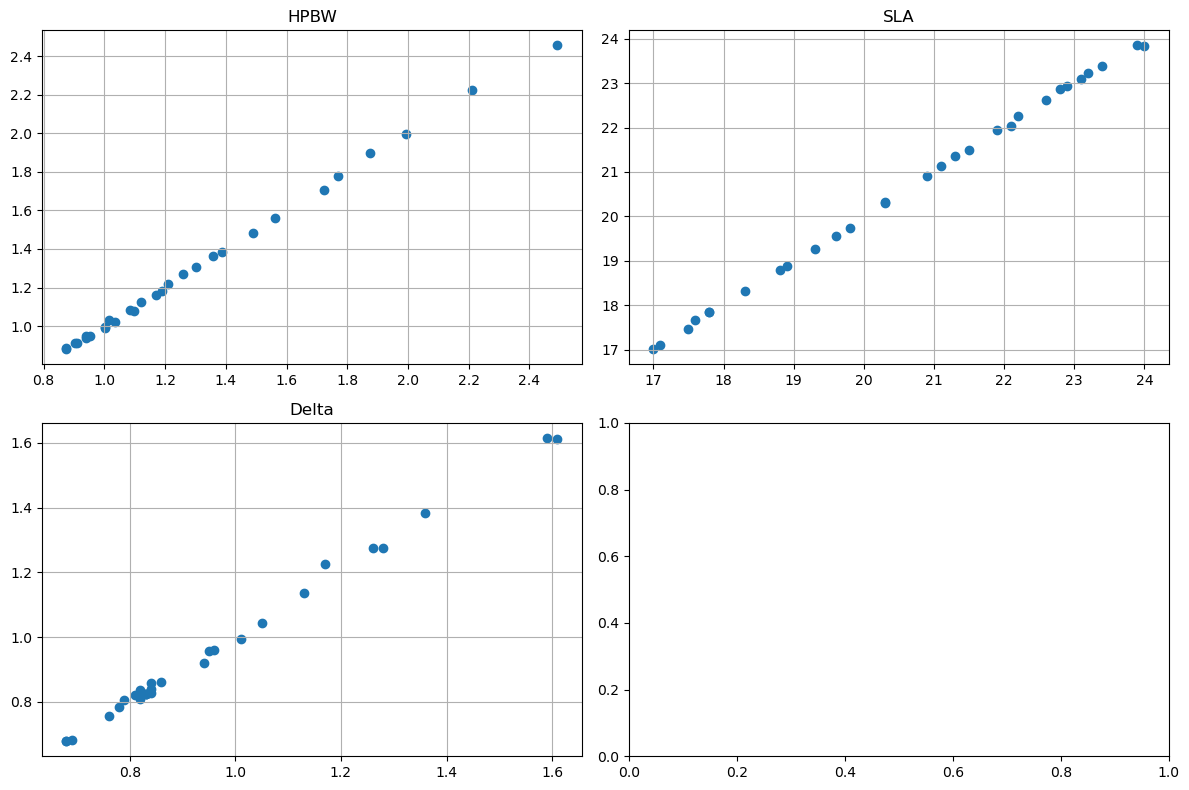

In [16]:
# Create a figure and three subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 3 rows, 1 column

# Plot data in the first subplot
axs[0,0].scatter(y_test[:, 0], y_pred[:, 0])
axs[0,0].set_title('HPBW')
axs[0,0].grid(True)

# Plot data in the second subplot
axs[0,1].scatter(y_test[:, 1], y_pred[:, 1])
axs[0,1].set_title('SLA')
axs[0,1].grid(True)

# Plot data in the third subplot
axs[1,0].scatter(y_test[:, 2], y_pred[:, 2])
axs[1,0].set_title('Delta')
axs[1,0].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [17]:
model_1_8 = test_results[0]['model']
y_pred2 = model_1_8.predict(X_test, verbose=0)

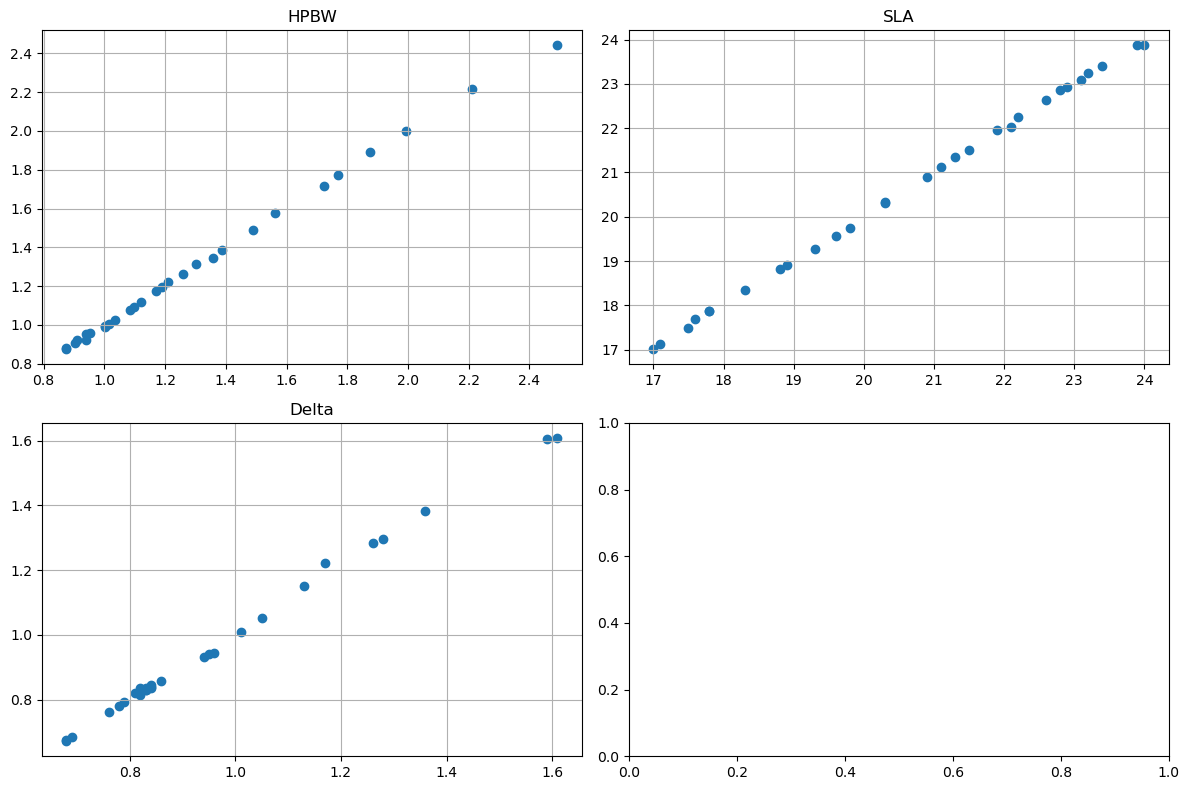

In [18]:
# Create a figure and three subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 3 rows, 1 column

# Plot data in the first subplot
axs[0,0].scatter(y_test[:, 0], y_pred2[:, 0])
axs[0,0].set_title('HPBW')
axs[0,0].grid(True)

# Plot data in the second subplot
axs[0,1].scatter(y_test[:, 1], y_pred2[:, 1])
axs[0,1].set_title('SLA')
axs[0,1].grid(True)

# Plot data in the third subplot
axs[1,0].scatter(y_test[:, 2], y_pred2[:, 2])
axs[1,0].set_title('Delta')
axs[1,0].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [19]:
loaded_vars = load_data(*['models1_5'])
models1_5 = loaded_vars['models1_5']
models1_5

Variable 'models1_5' has been loaded.


[{'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [7],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0,
  'batch_norm': 'no',
  'training_loss': 0.038140472024679184,
  'val_loss': 0.03761453554034233,
  'epochs': 100},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [4],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0,
  'batch_norm': 'no',
  'training_loss': 0.09856395423412323,
  'val_loss': 0.09754426032304764,
  'epochs': 100},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [6],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0,
  'batch_norm': 'no',
  'training_loss': 0.09912754595279694,
  'val_loss': 0.097890205681324,
  'epochs': 100},
 {'model': <Sequential name=sequential, built=True>,
  'hidden_layers': 1,
  'hidden_layer_neurons': [3],
  'learning_rate': 0.1,
  'regularization_lambda': 0.0,
  'batch

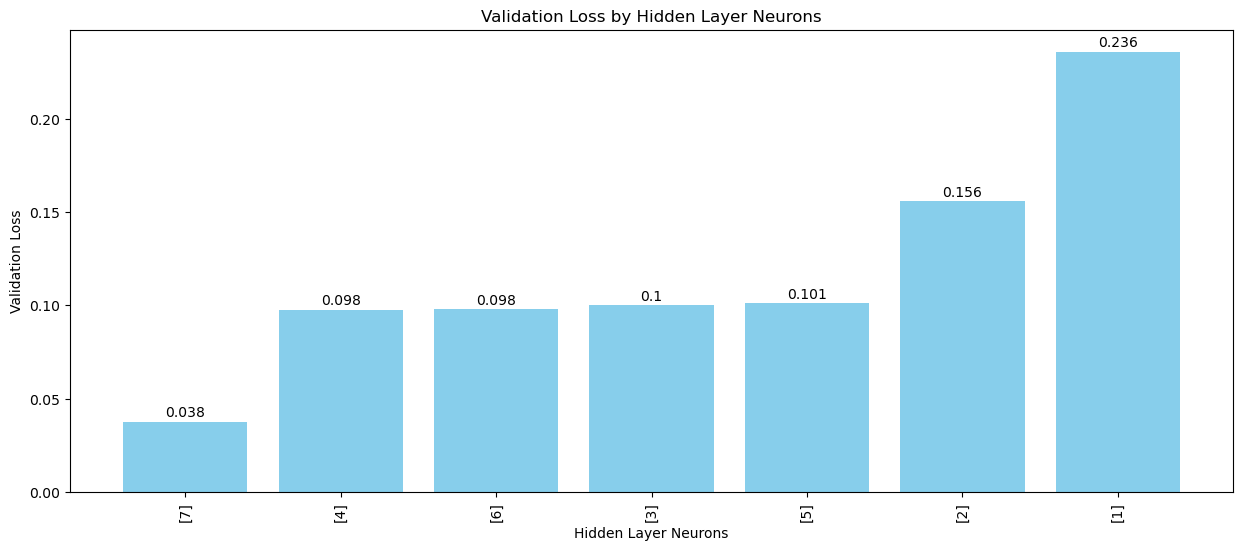

In [20]:
disp_loss(models1_5)

In [21]:
y_pred3 = models1_5[0]['model'].predict(X_test, verbose=0)

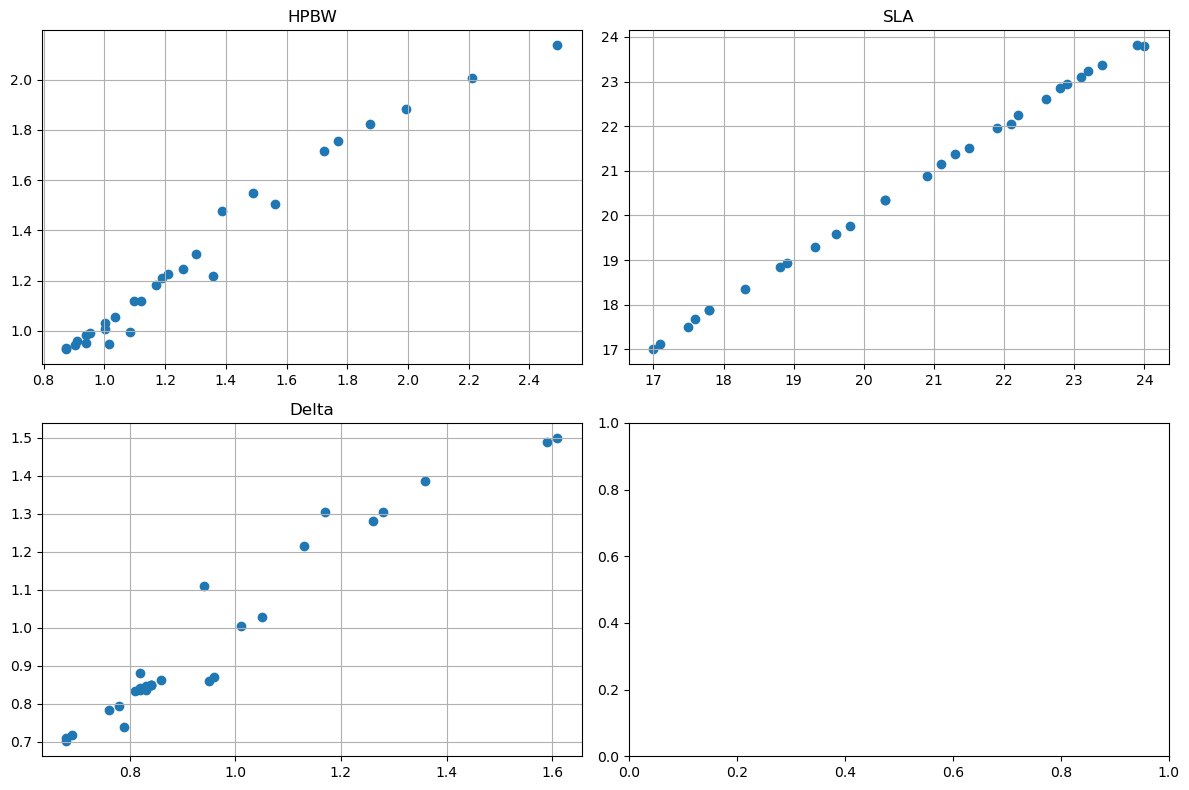

In [22]:
# Create a figure and three subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 3 rows, 1 column

# Plot data in the first subplot
axs[0,0].scatter(y_test[:, 0], y_pred3[:, 0])
axs[0,0].set_title('HPBW')
axs[0,0].grid(True)

# Plot data in the second subplot
axs[0,1].scatter(y_test[:, 1], y_pred3[:, 1])
axs[0,1].set_title('SLA')
axs[0,1].grid(True)

# Plot data in the third subplot
axs[1,0].scatter(y_test[:, 2], y_pred3[:, 2])
axs[1,0].set_title('Delta')
axs[1,0].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

In [23]:
pred = models1_5[1]['model'].predict(X_test, verbose=0)

In [24]:
mean_absolute_percentage_error(y_test, pred) * 100

6.506979363821587

In [25]:
pred = model_1_8.predict(X_test, verbose=0)

In [26]:
mean_absolute_percentage_error(y_test, pred) * 100

0.6144525147969155

In [27]:
pred = model_1_16.predict(X_test, verbose=0)

In [28]:
mean_absolute_percentage_error(y_test, pred) * 100

0.6496201758600713